In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']
    
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,43.000420,1132.989990
2010-01-05,43.014503,1136.520020
2010-01-06,42.810467,1137.140015
2010-01-07,42.578300,1141.689941
2010-01-08,42.522018,1144.979980


<AxesSubplot:xlabel='Date'>

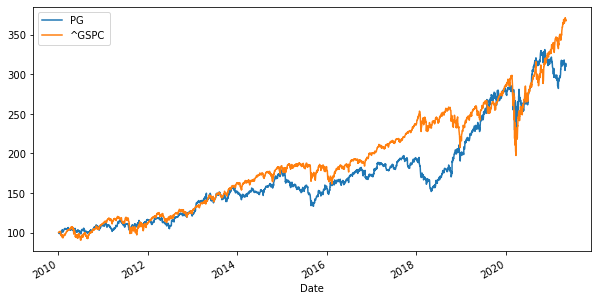

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10,5))

In [16]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [17]:
log_returns.mean() * 250

PG       0.099246
^GSPC    0.114132
dtype: float64

In [18]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029120,0.017561
^GSPC,0.017561,0.030300


In [20]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.591188
^GSPC,0.591188,1.000000


In [22]:
num_assets = len(assets)
num_assets

2

In [25]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.61630353, 0.38369647])

In [27]:
weights[0] + weights[1]

1.0

In [31]:
# retorno esperado
np.sum(weights * log_returns.mean()) * 250

0.10495763681024921

In [33]:
# variancia
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.023826589092159057

In [35]:
# volatividade
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.15435863789292473

In [37]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.10418849329220067,
  0.10734062604691305,
  0.10788454297929993,
  0.10785108711889878,
  0.11061558507937191,
  0.10650115617840418,
  0.10977042063949345,
  0.10643207997132255,
  0.10639536422149198,
  0.10699604888365995,
  0.10839714838012764,
  0.10338109205739775,
  0.10626992800796066,
  0.10312523585537944,
  0.11097862209827955,
  0.10872520642031626,
  0.10270939101301492,
  0.10673690094216426,
  0.10512861683165761,
  0.099854035213291,
  0.10372179982918714,
  0.10544995071294304,
  0.10076893894351303,
  0.1077347166574078,
  0.10592678706370756,
  0.10528374545779398,
  0.10782877729878274,
  0.10120747583497565,
  0.11396625701430621,
  0.1089379455430037,
  0.09972125395981496,
  0.10939625592677134,
  0.10165389210251434,
  0.10276085232340397,
  0.1026519341794365,
  0.10450961292090359,
  0.10186626797698302,
  0.11135854341975225,
  0.11276358557578246,
  0.10643832233577952,
  0.10641600030483081,
  0.10831769309351728,
  0.11031851191474086,
  0.109949813237

In [41]:
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10418849, 0.10734063, 0.10788454, 0.10785109, 0.11061559,
        0.10650116, 0.10977042, 0.10643208, 0.10639536, 0.10699605,
        0.10839715, 0.10338109, 0.10626993, 0.10312524, 0.11097862,
        0.10872521, 0.10270939, 0.1067369 , 0.10512862, 0.09985404,
        0.1037218 , 0.10544995, 0.10076894, 0.10773472, 0.10592679,
        0.10528375, 0.10782878, 0.10120748, 0.11396626, 0.10893795,
        0.09972125, 0.10939626, 0.10165389, 0.10276085, 0.10265193,
        0.10450961, 0.10186627, 0.11135854, 0.11276359, 0.10643832,
        0.106416  , 0.10831769, 0.11031851, 0.10994981, 0.11244732,
        0.1073362 , 0.10838223, 0.10905473, 0.10828661, 0.10682414,
        0.10675343, 0.10556492, 0.10319986, 0.10463946, 0.10430354,
        0.1037044 , 0.10207968, 0.10636454, 0.11319938, 0.10436322,
        0.10123698, 0.10243481, 0.1076739 , 0.10587243, 0.11309496,
        0.11282676, 0.10788672, 0.10646814, 0.10764719, 0.10420249,
        0.10794176, 0.10282848, 0.10736016, 0.10

In [42]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.104188,0.155314
1,0.107341,0.154057
2,0.107885,0.154553
3,0.107851,0.154517
4,0.110616,0.160116


Text(0, 0.5, 'Expected Return')

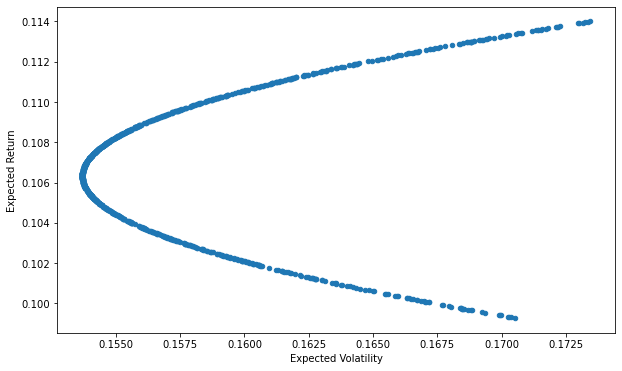

In [44]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')